In [1]:
import scanpy as sc
adata = sc.read('../data/xenium/improved_outs/grouped_filtered_stardist_buffered07_voronoi_adata.h5ad')

In [2]:
adata

AnnData object with n_obs × n_vars = 38722 × 541
    obs: 'id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
import pandas as pd
csv_data = pd.read_csv('../data/xenium/41467_2023_43458_MOESM4_ESM.csv')

In [4]:
csv_data

,Genes,DCIS_1,DCIS_2,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,...,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
0,SERPINA3,2.327150,1.637294,-0.531378,-0.544919,2.075936,1.664456,-0.502572,-0.538760,-0.589960,...,-0.502320,-0.536950,-0.521432,-0.458220,-0.473244,-0.554848,-0.426263,-0.244188,-0.556693,-0.331122
1,ESR1,3.572079,1.791021,0.300844,-0.042592,0.431788,-0.202569,-0.396183,-0.562775,-0.591560,...,-0.545251,-0.544589,-0.262311,-0.392398,-0.239356,-0.623361,-0.279893,-0.162283,-0.483418,-0.440892
2,CEACAM6,3.621209,1.786169,-0.422193,-0.382355,0.341947,0.349583,-0.382157,-0.461351,-0.501984,...,-0.433649,-0.389543,-0.414885,-0.384354,-0.346393,-0.470224,-0.313836,-0.174916,-0.478270,-0.377087
3,CEACAM8,3.330266,2.191152,0.004957,0.029682,0.223742,0.457422,-0.379674,-0.500369,-0.529298,...,-0.526940,-0.497042,-0.495499,-0.416960,-0.383465,-0.526286,-0.369060,-0.340507,-0.524282,-0.445508
4,AGR3,2.219148,3.213558,0.083560,-0.248952,0.960034,-0.119078,-0.398760,-0.508153,-0.529606,...,-0.472275,-0.485073,-0.449064,-0.429822,-0.447497,-0.517179,-0.364233,-0.298631,-0.514593,-0.436912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,PPARG,-0.338426,-0.507219,0.316962,-0.141006,-0.559448,-0.584905,-0.120495,-0.537300,-0.639934,...,-0.572286,-0.500312,-0.480455,0.200765,0.104691,-0.464516,-0.419073,0.760710,0.824744,3.822161
309,TCF15,-0.431056,-0.359757,-0.238780,-0.325422,-0.330731,-0.402823,0.306865,-0.162181,-0.415775,...,0.046680,-0.648853,-0.310222,-0.283616,-0.128917,-0.648853,-0.648853,0.190319,0.846502,3.968071
310,TCF4,-0.705485,-0.731847,-0.684185,-0.685841,-0.396396,-0.716368,-0.583386,-0.497069,-0.582606,...,-0.423529,2.517738,0.249668,-0.136094,0.119409,-0.297976,-0.391752,1.085481,0.502645,2.658135
311,AKR1C1,0.298755,-0.465756,-0.794885,-0.797805,0.059594,2.073501,-0.855245,-0.795098,-0.837757,...,-0.140717,0.982352,-0.742926,-0.328333,0.075570,-0.860275,-0.245074,2.076440,-0.297012,2.012176


In [5]:
csv_data = csv_data.drop(columns=['Unlabeled'])

In [8]:
csv_data = csv_data.rename(columns={
    'temp': 'DCIS_2'
})

In [9]:
adata_genes = adata.var_names
adata_genes

Index(['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ',
       'AGR3', 'AHSP', 'AIF1',
       ...
       'ZEB2', 'ZNF562', 'antisense_ADCY4', 'antisense_BCL2L15',
       'antisense_LGI3', 'antisense_MYLIP', 'antisense_PROKR2',
       'antisense_SCRIB', 'antisense_TRMU', 'antisense_ULK3'],
      dtype='object', name='feature_name', length=541)

In [10]:
# Extract gene names from AnnData and CSV
adata_genes = adata.var_names
csv_genes = csv_data['Genes']

# Ensure genes in both datasets match
common_genes = adata_genes.intersection(csv_genes)

# Subset AnnData and CSV data to include only common genes
adata = adata[:, common_genes]
csv_data = csv_data[csv_data['Genes'].isin(common_genes)]


In [11]:
adata.var.index

Index(['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ',
       'AGR3', 'AHSP', 'AIF1',
       ...
       'TUBB2B', 'TYROBP', 'UCP1', 'USP53', 'VOPP1', 'VWF', 'WARS', 'ZEB1',
       'ZEB2', 'ZNF562'],
      dtype='object', name='feature_name', length=313)

In [12]:
csv_data['Genes']

0      SERPINA3
1          ESR1
2       CEACAM6
3       CEACAM8
4          AGR3
         ...   
308       PPARG
309       TCF15
310        TCF4
311      AKR1C1
312      AKR1C3
Name: Genes, Length: 313, dtype: object

In [13]:
csv_data

,Genes,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
0,SERPINA3,2.327150,1.637294,-0.531378,-0.544919,2.075936,1.664456,-0.502572,-0.538760,-0.589960,-0.502320,-0.536950,-0.521432,-0.458220,-0.473244,-0.554848,-0.426263,-0.244188,-0.556693,-0.331122
1,ESR1,3.572079,1.791021,0.300844,-0.042592,0.431788,-0.202569,-0.396183,-0.562775,-0.591560,-0.545251,-0.544589,-0.262311,-0.392398,-0.239356,-0.623361,-0.279893,-0.162283,-0.483418,-0.440892
2,CEACAM6,3.621209,1.786169,-0.422193,-0.382355,0.341947,0.349583,-0.382157,-0.461351,-0.501984,-0.433649,-0.389543,-0.414885,-0.384354,-0.346393,-0.470224,-0.313836,-0.174916,-0.478270,-0.377087
3,CEACAM8,3.330266,2.191152,0.004957,0.029682,0.223742,0.457422,-0.379674,-0.500369,-0.529298,-0.526940,-0.497042,-0.495499,-0.416960,-0.383465,-0.526286,-0.369060,-0.340507,-0.524282,-0.445508
4,AGR3,2.219148,3.213558,0.083560,-0.248952,0.960034,-0.119078,-0.398760,-0.508153,-0.529606,-0.472275,-0.485073,-0.449064,-0.429822,-0.447497,-0.517179,-0.364233,-0.298631,-0.514593,-0.436912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,PPARG,-0.338426,-0.507219,0.316962,-0.141006,-0.559448,-0.584905,-0.120495,-0.537300,-0.639934,-0.572286,-0.500312,-0.480455,0.200765,0.104691,-0.464516,-0.419073,0.760710,0.824744,3.822161
309,TCF15,-0.431056,-0.359757,-0.238780,-0.325422,-0.330731,-0.402823,0.306865,-0.162181,-0.415775,0.046680,-0.648853,-0.310222,-0.283616,-0.128917,-0.648853,-0.648853,0.190319,0.846502,3.968071
310,TCF4,-0.705485,-0.731847,-0.684185,-0.685841,-0.396396,-0.716368,-0.583386,-0.497069,-0.582606,-0.423529,2.517738,0.249668,-0.136094,0.119409,-0.297976,-0.391752,1.085481,0.502645,2.658135
311,AKR1C1,0.298755,-0.465756,-0.794885,-0.797805,0.059594,2.073501,-0.855245,-0.795098,-0.837757,-0.140717,0.982352,-0.742926,-0.328333,0.075570,-0.860275,-0.245074,2.076440,-0.297012,2.012176


In [14]:
# Ensure both gene lists are in the same case
adata_genes = adata.var.index.str.upper()
csv_genes = csv_data['Genes'].str.upper()

# Create a mapping between adata genes and csv data rows
csv_data.index = csv_genes  # Set the gene names as the index for easier lookup

# Filter and reorder the csv_data to match the order of adata genes
csv_data_reordered = csv_data.loc[adata_genes].dropna()


In [15]:
csv_data_reordered

,Genes,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
feature_name,,,,,,,,,,,,,,,,,,,,
ABCC11,ABCC11,1.627568,0.103818,2.462698,2.652923,-0.413890,-0.182707,-0.054479,-0.535060,-0.568054,-0.519494,-0.529454,-0.511962,-0.387892,-0.478463,-0.555539,-0.528292,-0.302518,-0.512950,-0.437394
ACTA2,ACTA2,-0.147560,-0.456253,-0.286599,-0.374978,1.571581,-0.483258,-0.433844,-0.492023,-0.546879,-0.432903,-0.465872,-0.521565,-0.394747,-0.415543,-0.463975,-0.431397,0.463068,3.544140,0.951923
ACTG2,ACTG2,0.853811,-0.101744,0.688588,0.183123,3.298948,0.150006,-0.518020,-0.761809,-1.017506,-0.860185,-0.642513,-0.843472,-0.052951,-0.619625,0.133467,-0.877556,0.046004,1.351866,-0.098524
ADAM9,ADAM9,0.641999,0.996737,1.973919,1.070857,0.038601,2.348248,-0.512094,-1.002861,-1.126528,-0.955982,-0.717369,-0.940024,-0.068820,0.414614,-0.933312,-0.837433,0.295960,-0.161226,0.060463
ADGRE5,ADGRE5,-1.317558,-1.461023,-1.489023,-1.474173,-0.976652,-0.554050,0.848954,1.859226,0.431848,0.822463,0.187711,0.567568,0.284671,0.503026,-1.030036,0.021441,0.341775,1.422454,0.435202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VWF,VWF,-0.308381,-0.310295,-0.242985,-0.257147,-0.276106,-0.322238,-0.198615,-0.230621,-0.234133,-0.248283,-0.177224,-0.243774,-0.219656,-0.175439,-0.217009,-0.172035,-0.062523,-0.182650,4.241487
WARS,WARS,0.423956,-0.096414,1.314041,0.660351,0.165117,0.349285,-0.436244,-0.946291,-1.405793,-1.075456,-0.946109,0.297322,1.113842,-0.906031,1.670549,-1.236518,0.500974,-0.835508,1.923884
ZEB1,ZEB1,-0.924201,-0.962277,-0.767225,-0.781500,0.157335,-0.981748,-0.140023,-0.113061,-0.460319,-0.137586,-0.151832,-0.118053,-0.212667,-0.365105,0.257218,-0.229417,1.932190,0.861553,3.155753


In [16]:

csv_data_reordered = csv_data_reordered.drop(columns='Genes')

In [17]:
csv_data_reordered

,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
feature_name,,,,,,,,,,,,,,,,,,,
ABCC11,1.627568,0.103818,2.462698,2.652923,-0.413890,-0.182707,-0.054479,-0.535060,-0.568054,-0.519494,-0.529454,-0.511962,-0.387892,-0.478463,-0.555539,-0.528292,-0.302518,-0.512950,-0.437394
ACTA2,-0.147560,-0.456253,-0.286599,-0.374978,1.571581,-0.483258,-0.433844,-0.492023,-0.546879,-0.432903,-0.465872,-0.521565,-0.394747,-0.415543,-0.463975,-0.431397,0.463068,3.544140,0.951923
ACTG2,0.853811,-0.101744,0.688588,0.183123,3.298948,0.150006,-0.518020,-0.761809,-1.017506,-0.860185,-0.642513,-0.843472,-0.052951,-0.619625,0.133467,-0.877556,0.046004,1.351866,-0.098524
ADAM9,0.641999,0.996737,1.973919,1.070857,0.038601,2.348248,-0.512094,-1.002861,-1.126528,-0.955982,-0.717369,-0.940024,-0.068820,0.414614,-0.933312,-0.837433,0.295960,-0.161226,0.060463
ADGRE5,-1.317558,-1.461023,-1.489023,-1.474173,-0.976652,-0.554050,0.848954,1.859226,0.431848,0.822463,0.187711,0.567568,0.284671,0.503026,-1.030036,0.021441,0.341775,1.422454,0.435202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VWF,-0.308381,-0.310295,-0.242985,-0.257147,-0.276106,-0.322238,-0.198615,-0.230621,-0.234133,-0.248283,-0.177224,-0.243774,-0.219656,-0.175439,-0.217009,-0.172035,-0.062523,-0.182650,4.241487
WARS,0.423956,-0.096414,1.314041,0.660351,0.165117,0.349285,-0.436244,-0.946291,-1.405793,-1.075456,-0.946109,0.297322,1.113842,-0.906031,1.670549,-1.236518,0.500974,-0.835508,1.923884
ZEB1,-0.924201,-0.962277,-0.767225,-0.781500,0.157335,-0.981748,-0.140023,-0.113061,-0.460319,-0.137586,-0.151832,-0.118053,-0.212667,-0.365105,0.257218,-0.229417,1.932190,0.861553,3.155753


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert AnnData matrix to dense format (if it's sparse)
adata_matrix = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X

# Convert CSV data to NumPy array
csv_matrix = csv_data_reordered.values
csv_matrix = csv_matrix.T

# Initialize a dictionary to store similarities
similarity_results = {}

# Compute cosine similarity for each cell in adata with each cell in CSV data
for i, adata_row in enumerate(adata_matrix):
    similarities = cosine_similarity([adata_row], csv_matrix)
    similarity_results[adata.obs.index[i]] = similarities.flatten()

similarity_results

{'ID_1000032': array([ 0.13394798,  0.0612943 ,  0.20044622,  0.16799218,  0.01886294,
         0.05601445,  0.0021935 , -0.06546564, -0.09667609, -0.10249009,
        -0.05445394, -0.05600742, -0.04903925, -0.06546708, -0.09570598,
        -0.07327352,  0.004964  , -0.0767748 , -0.02193541]),
 'ID_1000075': array([ 0.15876612,  0.13223573,  0.12076388,  0.08563941,  0.00444098,
         0.07919858,  0.02168794, -0.03103757, -0.07008054, -0.08729078,
        -0.05201158, -0.04339509, -0.06077457, -0.08902084, -0.10146912,
        -0.03598929, -0.01279589, -0.08190567, -0.01753598]),
 'ID_1000195': array([ 0.25636404,  0.17039745,  0.31003548,  0.26015516,  0.01733624,
         0.07465614,  0.04117669, -0.06752448, -0.19907534, -0.21058557,
        -0.09173089,  0.02931975, -0.02251503, -0.13971754, -0.13197308,
        -0.21232078, -0.01240421, -0.2188138 , -0.0437257 ]),
 'ID_1000352': array([ 0.08659782,  0.00399906,  0.0402229 ,  0.02474143,  0.42861655,
         0.16462081, -0.0882

In [19]:
# Extract column names from CSV data
column_names = csv_data_reordered.columns.tolist()


In [20]:
similarity_df = pd.DataFrame(similarity_results).T  # Transpose to have cell IDs as rows

# Set column names
similarity_df.columns = column_names

# Display the resulting DataFrame
print(similarity_df)

              DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
ID_1000032  0.133948  0.061294               0.200446        0.167992  \
ID_1000075  0.158766  0.132236               0.120764        0.085639   
ID_1000195  0.256364  0.170397               0.310035        0.260155   
ID_1000352  0.086598  0.003999               0.040223        0.024741   
ID_1000428  0.198604  0.155195               0.247612        0.227937   
...              ...       ...                    ...             ...   
ID_999822   0.133605  0.210902               0.187400        0.182582   
ID_999843   0.080955  0.030709               0.052705        0.042072   
ID_999848   0.001021 -0.073365               0.086649       -0.022539   
ID_999849   0.055758 -0.087702               0.106948        0.010401   
ID_99993   -0.001636 -0.086690               0.072427       -0.006611   

            Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
ID_1000032       0.018863       0.056014  

In [21]:
similarity_df['CellType'] = similarity_df.idxmax(axis=1)

# Display the DataFrame with the new 'CellType' column
print(similarity_df[['CellType']])

                         CellType
ID_1000032  Prolif_Invasive_Tumor
ID_1000075                 DCIS_2
ID_1000195  Prolif_Invasive_Tumor
ID_1000352          Myoepi_ACTA2+
ID_1000428  Prolif_Invasive_Tumor
...                           ...
ID_999822                  DCIS_1
ID_999843                 Stromal
ID_999848                 Stromal
ID_999849           Macrophages_1
ID_99993                  Stromal

[38722 rows x 1 columns]


In [22]:
similarity_df

,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial,CellType
ID_1000032,0.133948,0.061294,0.200446,0.167992,0.018863,0.056014,0.002194,-0.065466,-0.096676,-0.102490,-0.054454,-0.056007,-0.049039,-0.065467,-0.095706,-0.073274,0.004964,-0.076775,-0.021935,Prolif_Invasive_Tumor
ID_1000075,0.158766,0.132236,0.120764,0.085639,0.004441,0.079199,0.021688,-0.031038,-0.070081,-0.087291,-0.052012,-0.043395,-0.060775,-0.089021,-0.101469,-0.035989,-0.012796,-0.081906,-0.017536,DCIS_2
ID_1000195,0.256364,0.170397,0.310035,0.260155,0.017336,0.074656,0.041177,-0.067524,-0.199075,-0.210586,-0.091731,0.029320,-0.022515,-0.139718,-0.131973,-0.212321,-0.012404,-0.218814,-0.043726,Prolif_Invasive_Tumor
ID_1000352,0.086598,0.003999,0.040223,0.024741,0.428617,0.164621,-0.088222,-0.094693,-0.138086,-0.144831,-0.076932,-0.085085,-0.061608,-0.071962,-0.077833,-0.099188,-0.013356,0.083164,0.026275,Myoepi_ACTA2+
ID_1000428,0.198604,0.155195,0.247612,0.227937,0.000192,0.018453,-0.030296,-0.069430,-0.242312,-0.184391,-0.096245,-0.038271,-0.012359,-0.015495,-0.165796,-0.143647,0.141353,-0.176133,-0.016194,Prolif_Invasive_Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_999822,0.133605,0.210902,0.187400,0.182582,0.062336,0.057837,0.009861,-0.067351,-0.114031,-0.114825,-0.102875,-0.083432,-0.083741,-0.102137,-0.135975,-0.067057,0.012318,-0.094982,0.020808,DCIS_1
ID_999843,0.080955,0.030709,0.052705,0.042072,-0.025426,-0.008984,-0.020206,-0.043507,-0.100760,-0.052373,-0.013729,-0.026617,0.061631,0.098374,-0.094059,-0.040084,0.120666,-0.099986,-0.038645,Stromal
ID_999848,0.001021,-0.073365,0.086649,-0.022539,0.041525,0.005818,-0.096838,-0.093484,-0.231991,-0.048914,-0.073897,-0.033731,-0.033193,0.009495,-0.131441,-0.057209,0.454898,-0.040917,0.094016,Stromal
ID_999849,0.055758,-0.087702,0.106948,0.010401,-0.097149,-0.035010,-0.086131,-0.102462,-0.231700,-0.229137,0.084275,-0.025530,0.396705,0.341821,-0.053804,-0.132434,0.102335,-0.176567,-0.053007,Macrophages_1


In [23]:
numeric_df = similarity_df.drop(columns=['CellType'])

# Find the maximum value per row
similarity_df['similarity'] = numeric_df.max(axis=1)

In [24]:
similarity_df

,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,...,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial,CellType,similarity
ID_1000032,0.133948,0.061294,0.200446,0.167992,0.018863,0.056014,0.002194,-0.065466,-0.096676,-0.102490,...,-0.056007,-0.049039,-0.065467,-0.095706,-0.073274,0.004964,-0.076775,-0.021935,Prolif_Invasive_Tumor,0.200446
ID_1000075,0.158766,0.132236,0.120764,0.085639,0.004441,0.079199,0.021688,-0.031038,-0.070081,-0.087291,...,-0.043395,-0.060775,-0.089021,-0.101469,-0.035989,-0.012796,-0.081906,-0.017536,DCIS_2,0.158766
ID_1000195,0.256364,0.170397,0.310035,0.260155,0.017336,0.074656,0.041177,-0.067524,-0.199075,-0.210586,...,0.029320,-0.022515,-0.139718,-0.131973,-0.212321,-0.012404,-0.218814,-0.043726,Prolif_Invasive_Tumor,0.310035
ID_1000352,0.086598,0.003999,0.040223,0.024741,0.428617,0.164621,-0.088222,-0.094693,-0.138086,-0.144831,...,-0.085085,-0.061608,-0.071962,-0.077833,-0.099188,-0.013356,0.083164,0.026275,Myoepi_ACTA2+,0.428617
ID_1000428,0.198604,0.155195,0.247612,0.227937,0.000192,0.018453,-0.030296,-0.069430,-0.242312,-0.184391,...,-0.038271,-0.012359,-0.015495,-0.165796,-0.143647,0.141353,-0.176133,-0.016194,Prolif_Invasive_Tumor,0.247612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_999822,0.133605,0.210902,0.187400,0.182582,0.062336,0.057837,0.009861,-0.067351,-0.114031,-0.114825,...,-0.083432,-0.083741,-0.102137,-0.135975,-0.067057,0.012318,-0.094982,0.020808,DCIS_1,0.210902
ID_999843,0.080955,0.030709,0.052705,0.042072,-0.025426,-0.008984,-0.020206,-0.043507,-0.100760,-0.052373,...,-0.026617,0.061631,0.098374,-0.094059,-0.040084,0.120666,-0.099986,-0.038645,Stromal,0.120666
ID_999848,0.001021,-0.073365,0.086649,-0.022539,0.041525,0.005818,-0.096838,-0.093484,-0.231991,-0.048914,...,-0.033731,-0.033193,0.009495,-0.131441,-0.057209,0.454898,-0.040917,0.094016,Stromal,0.454898
ID_999849,0.055758,-0.087702,0.106948,0.010401,-0.097149,-0.035010,-0.086131,-0.102462,-0.231700,-0.229137,...,-0.025530,0.396705,0.341821,-0.053804,-0.132434,0.102335,-0.176567,-0.053007,Macrophages_1,0.396705


In [25]:
import pandas as pd

# Assuming similarity_df is already defined

# Drop the 'CellType' column and retain only numerical data
similarity_data = similarity_df.drop(columns=['CellType'])

In [26]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
2024-09-02 08:05:28.669820: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
celltype_df = similarity_df[['CellType']].copy()

In [28]:
adata2_indices = adata.obs.index
celltype_df_indices = celltype_df.index

print(adata2_indices.equals(celltype_df_indices))

True


In [29]:
adata.obs['CellType'] = celltype_df['CellType']

In [30]:
adata.obs['similarity'] = similarity_df['similarity']

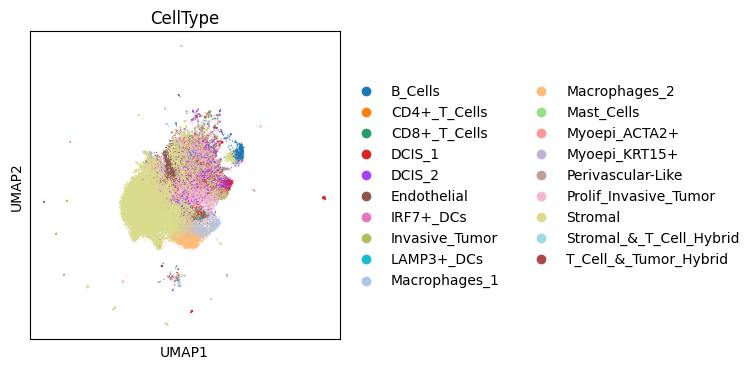

In [31]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=[ "CellType"], wspace=0.4)

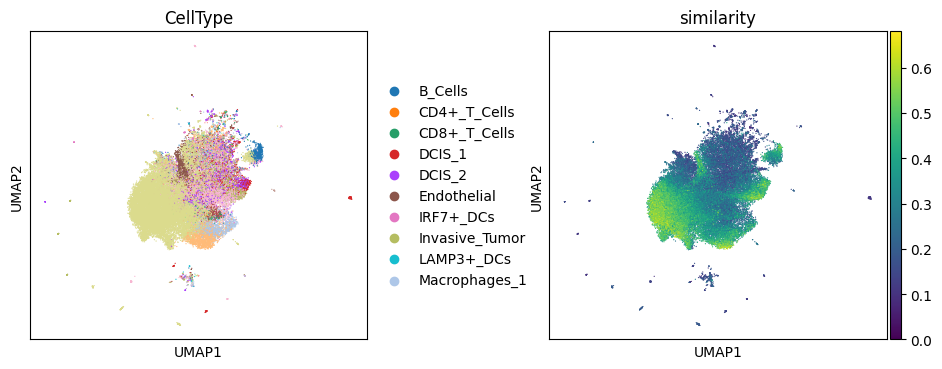

In [32]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["CellType", "similarity"], wspace=0.4)

In [33]:
annotation_csv = pd.read_csv('../data/xenium/outs/insitu_replicate_1_annotation.csv')
annotation_csv

,Barcode,Cluster
0,1,DCIS_1
1,2,DCIS_1
2,3,Unlabeled
3,4,Invasive_Tumor
4,5,DCIS_1
...,...,...
167775,167776,DCIS_2
167776,167777,DCIS_1
167777,167778,DCIS_2
167778,167779,DCIS_1


In [34]:
annotation_csv[annotation_csv['Barcode']==134602]

,Barcode,Cluster
134601,134602,Stromal


In [35]:
annotation_unlabeled = annotation_csv[annotation_csv['Cluster'] == 'Unlabeled']['Barcode'].values
annotation_unlabeled

array([     3,      6,      7, ..., 167622, 167623, 167772])

In [36]:
import geopandas as gpd
joined = gpd.read_file('../data/xenium/outs/final_adatas/filtered_gdf_stardist_buffered07_voronoi.geojson')

In [37]:
joined

,id,cell_id,geometry
0,ID_1000032,44225.0,"POLYGON ((10092.89892 21577.18819, 10048.14563..."
1,ID_1000075,15561.0,"POLYGON ((7767.58960 20892.36976, 7769.45503 2..."
2,ID_1000195,44769.0,"POLYGON ((8874.34467 20871.90624, 8906.18774 2..."
3,ID_1000352,47126.0,"POLYGON ((8538.99492 21229.91296, 8538.84585 2..."
4,ID_1000428,47382.0,"POLYGON ((9076.97193 21252.08849, 9076.73785 2..."
...,...,...,...
38717,ID_999822,44747.0,"POLYGON ((8930.48593 20946.29312, 8930.67501 2..."
38718,ID_999843,44947.0,"POLYGON ((9189.32048 21413.99852, 9189.45385 2..."
38719,ID_999848,47381.0,"POLYGON ((9126.43489 21394.31524, 9133.15058 2..."
38720,ID_999849,44949.0,"POLYGON ((9172.16770 21356.98711, 9171.61079 2..."


In [38]:
adata.obs.reset_index(drop=True, inplace=True)

In [39]:
adata.obs['id'] = adata.obs['id'].values

In [40]:
# Ensure IDs are of the same type
joined['id'] = joined['id'].astype(str)
adata.obs['id'] = adata.obs['id'].astype(str)

# Filter joined to only include rows with ids present in adata.obs['id']
filtered_joined = joined[joined['id'].isin(adata.obs['id'])]

# Drop duplicates based on the 'id' column

# Check the resulting DataFrame
print(filtered_joined)


               id  cell_id                                           geometry
0      ID_1000032  44225.0  POLYGON ((10092.89892 21577.18819, 10048.14563...
1      ID_1000075  15561.0  POLYGON ((7767.58960 20892.36976, 7769.45503 2...
2      ID_1000195  44769.0  POLYGON ((8874.34467 20871.90624, 8906.18774 2...
3      ID_1000352  47126.0  POLYGON ((8538.99492 21229.91296, 8538.84585 2...
4      ID_1000428  47382.0  POLYGON ((9076.97193 21252.08849, 9076.73785 2...
...           ...      ...                                                ...
38717   ID_999822  44747.0  POLYGON ((8930.48593 20946.29312, 8930.67501 2...
38718   ID_999843  44947.0  POLYGON ((9189.32048 21413.99852, 9189.45385 2...
38719   ID_999848  47381.0  POLYGON ((9126.43489 21394.31524, 9133.15058 2...
38720   ID_999849  44949.0  POLYGON ((9172.16770 21356.98711, 9171.61079 2...
38721    ID_99993  39840.0  POLYGON ((7185.93193 7842.72120, 7173.61565 78...

[38722 rows x 3 columns]


In [41]:
filtered_joined

,id,cell_id,geometry
0,ID_1000032,44225.0,"POLYGON ((10092.89892 21577.18819, 10048.14563..."
1,ID_1000075,15561.0,"POLYGON ((7767.58960 20892.36976, 7769.45503 2..."
2,ID_1000195,44769.0,"POLYGON ((8874.34467 20871.90624, 8906.18774 2..."
3,ID_1000352,47126.0,"POLYGON ((8538.99492 21229.91296, 8538.84585 2..."
4,ID_1000428,47382.0,"POLYGON ((9076.97193 21252.08849, 9076.73785 2..."
...,...,...,...
38717,ID_999822,44747.0,"POLYGON ((8930.48593 20946.29312, 8930.67501 2..."
38718,ID_999843,44947.0,"POLYGON ((9189.32048 21413.99852, 9189.45385 2..."
38719,ID_999848,47381.0,"POLYGON ((9126.43489 21394.31524, 9133.15058 2..."
38720,ID_999849,44949.0,"POLYGON ((9172.16770 21356.98711, 9171.61079 2..."


In [42]:
adata.obs = adata.obs.merge(filtered_joined[['id', 'cell_id']], on='id', how='left')

# Now adata.obs has a new 'cell_id' column
print(adata.obs.head())

           id  n_genes_by_counts  log1p_n_genes_by_counts  total_counts   
0  ID_1000032                  3                 1.386294           3.0  \
1  ID_1000075                  5                 1.791759           5.0   
2  ID_1000195                 29                 3.401197          35.0   
3  ID_1000352                  9                 2.302585          12.0   
4  ID_1000428                 28                 3.367296          46.0   

   log1p_total_counts  pct_counts_in_top_50_genes   
0            1.386294                       100.0  \
1            1.791759                       100.0   
2            3.583519                       100.0   
3            2.564949                       100.0   
4            3.850148                       100.0   

   pct_counts_in_top_100_genes  pct_counts_in_top_200_genes   
0                        100.0                        100.0  \
1                        100.0                        100.0   
2                        100.0           

In [43]:
annotation_csv['Barcode'] = annotation_csv['Barcode'].astype(float)

In [44]:
adata.obs['cell_id'] = adata.obs['cell_id'].astype(float)

In [45]:
# Perform the merge
merged_df = adata.obs.merge(annotation_csv, left_on='cell_id', right_on='Barcode', how='left')


In [46]:
adata.obs['realCellType'] = merged_df['Cluster']

In [47]:
adata.obs[adata.obs['cell_id']=='4']

,id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,clusters,CellType,similarity,cell_id,realCellType


In [48]:
# Filter out rows in adata where 'cell_id' is in the unlabeled_cell_ids list
adata = adata[~adata.obs['cell_id'].isin(annotation_unlabeled)]

/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


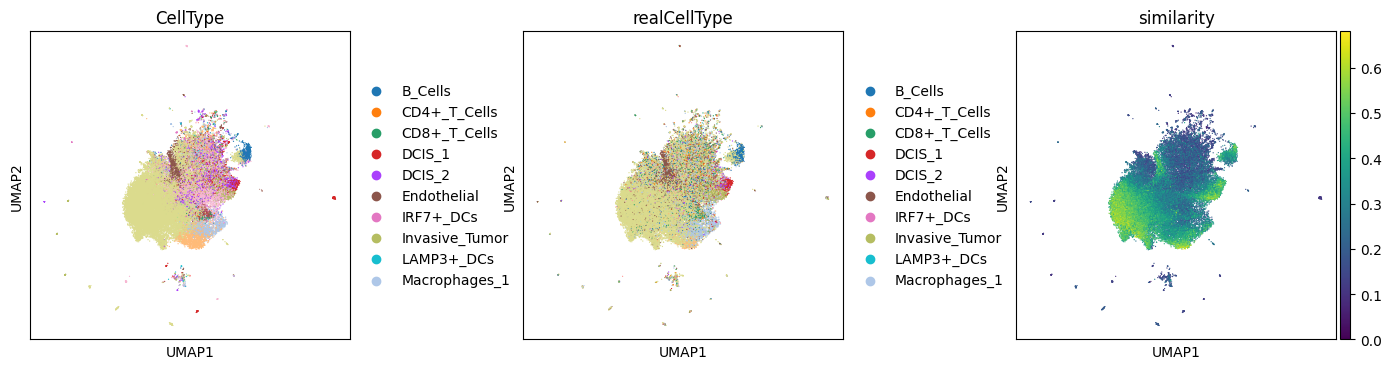

In [49]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["CellType", "realCellType", 'similarity'], wspace=0.4)

In [50]:
adata.obs

,id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,clusters,CellType,similarity,cell_id,realCellType
0,ID_1000032,3,1.386294,3.0,1.386294,100.000000,100.0,100.0,100.0,3,Prolif_Invasive_Tumor,0.200446,44225.0,Invasive_Tumor
1,ID_1000075,5,1.791759,5.0,1.791759,100.000000,100.0,100.0,100.0,1,DCIS_2,0.158766,15561.0,DCIS_1
2,ID_1000195,29,3.401197,35.0,3.583519,100.000000,100.0,100.0,100.0,1,Prolif_Invasive_Tumor,0.310035,44769.0,CD8+_T_Cells
3,ID_1000352,9,2.302585,12.0,2.564949,100.000000,100.0,100.0,100.0,1,Myoepi_ACTA2+,0.428617,47126.0,Perivascular-Like
4,ID_1000428,28,3.367296,46.0,3.850148,100.000000,100.0,100.0,100.0,1,Prolif_Invasive_Tumor,0.247612,47382.0,CD8+_T_Cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38717,ID_999822,9,2.302585,11.0,2.484907,100.000000,100.0,100.0,100.0,1,DCIS_1,0.210902,44747.0,DCIS_1
38718,ID_999843,10,2.397895,10.0,2.397895,100.000000,100.0,100.0,100.0,1,Stromal,0.120666,44947.0,T_Cell_&_Tumor_Hybrid
38719,ID_999848,51,3.951244,131.0,4.882802,99.236641,100.0,100.0,100.0,0,Stromal,0.454898,47381.0,Stromal
38720,ID_999849,66,4.204693,146.0,4.990433,89.041096,100.0,100.0,100.0,2,Macrophages_1,0.396705,44949.0,Macrophages_1


In [51]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(adata.obs['CellType'], adata.obs['realCellType'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.3628004072602665


In [52]:
adata.obs['cell_id'] = adata.obs['cell_id'].astype(str)
filtered_joined['cell_id'] = filtered_joined['cell_id'].astype(str)

In [53]:
filtered_joined_with_types = filtered_joined.merge(
    adata.obs[['cell_id', 'CellType', 'realCellType']],
    on='cell_id',
    how='left'
)

# Check the resulting GeoDataFrame
print(filtered_joined_with_types)

               id  cell_id                                           geometry   
0      ID_1000032  44225.0  POLYGON ((10092.89892 21577.18819, 10048.14563...  \
1      ID_1000075  15561.0  POLYGON ((7767.58960 20892.36976, 7769.45503 2...   
2      ID_1000195  44769.0  POLYGON ((8874.34467 20871.90624, 8906.18774 2...   
3      ID_1000352  47126.0  POLYGON ((8538.99492 21229.91296, 8538.84585 2...   
4      ID_1000428  47382.0  POLYGON ((9076.97193 21252.08849, 9076.73785 2...   
...           ...      ...                                                ...   
45321   ID_999822  44747.0  POLYGON ((8930.48593 20946.29312, 8930.67501 2...   
45322   ID_999843  44947.0  POLYGON ((9189.32048 21413.99852, 9189.45385 2...   
45323   ID_999848  47381.0  POLYGON ((9126.43489 21394.31524, 9133.15058 2...   
45324   ID_999849  44949.0  POLYGON ((9172.16770 21356.98711, 9171.61079 2...   
45325    ID_99993  39840.0  POLYGON ((7185.93193 7842.72120, 7173.61565 78...   

                    CellTyp

In [54]:
filtered_joined_with_types.crs = None


In [55]:
filtered_joined_with_types = filtered_joined_with_types[
    ~((filtered_joined_with_types['CellType'] == 'nan') | 
      (filtered_joined_with_types['realCellType'] == 'nan'))
]

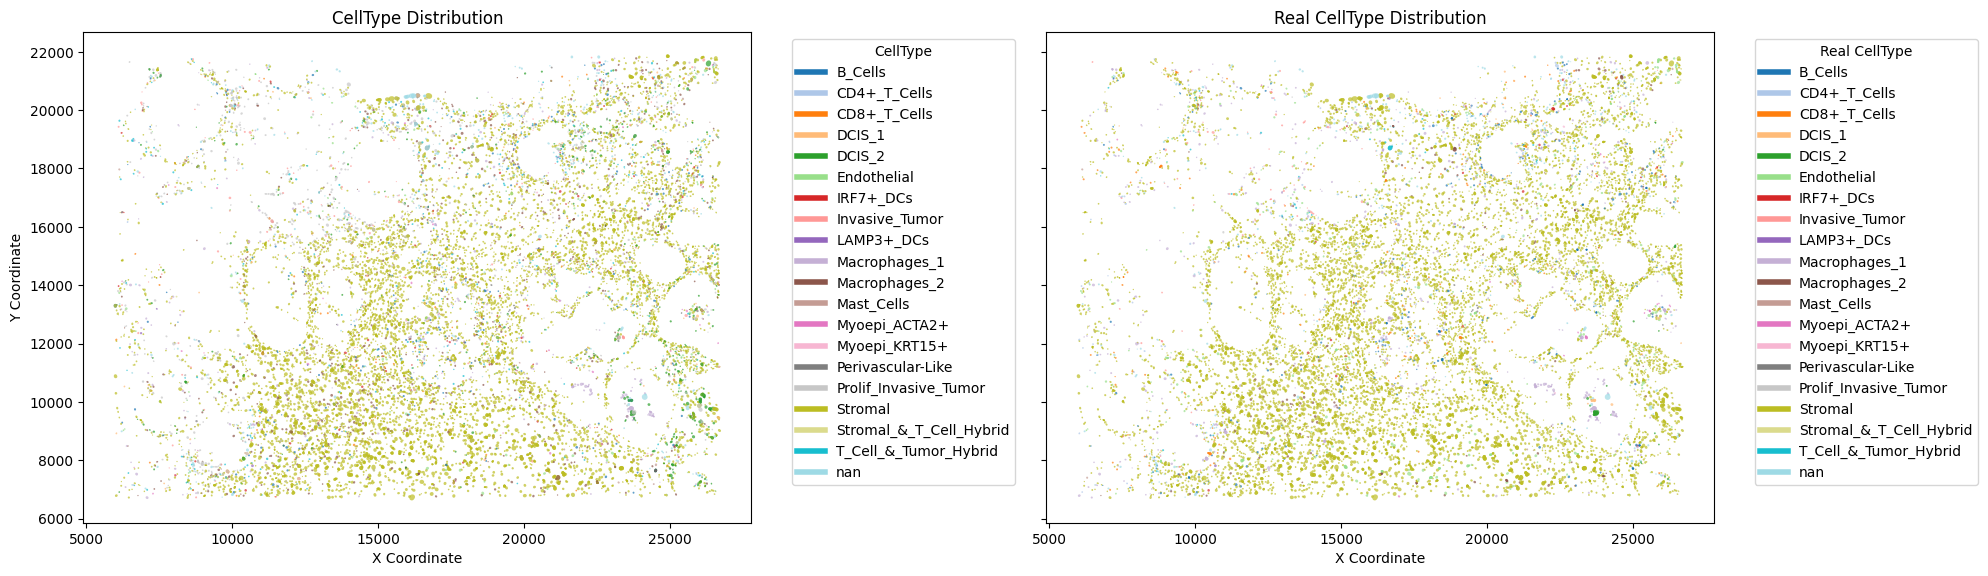

In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_joined_with_types['CellType'] = filtered_joined_with_types['CellType'].astype(str)
filtered_joined_with_types['realCellType'] = filtered_joined_with_types['realCellType'].astype(str)

# Extract unique categories from both columns
cell_type_categories = filtered_joined_with_types['CellType'].unique()
real_cell_type_categories = filtered_joined_with_types['realCellType'].unique()

# Combine unique categories from both columns
all_categories = sorted(set(cell_type_categories).union(real_cell_type_categories))

# Define a colormap with enough colors for all unique categories
num_categories = len(all_categories)
cmap = plt.get_cmap('tab20', num_categories) 
colors = {category: cmap(i) for i, category in enumerate(all_categories)}

# Define functions to get color based on category
def get_color(category):
    return colors.get(category, 'gray')  # Default to gray for unknown types

# Create legend handles
handles = [Line2D([0], [0], color=colors[cat], lw=4) for cat in all_categories]

# Create a figure with two subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# Plot by 'CellType'
filtered_joined_with_types.plot(
    ax=axarr[0],
    color=[get_color(ct) for ct in filtered_joined_with_types['CellType']],
    alpha=0.7
)
axarr[0].set_title('CellType Distribution')
axarr[0].set_xlabel('X Coordinate')
axarr[0].set_ylabel('Y Coordinate')
axarr[0].legend(handles=handles, labels=all_categories, title='CellType', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot by 'realCellType'
filtered_joined_with_types.plot(
    ax=axarr[1],
    color=[get_color(rct) for rct in filtered_joined_with_types['realCellType']],
    alpha=0.7
)
axarr[1].set_title('Real CellType Distribution')
axarr[1].set_xlabel('X Coordinate')
axarr[1].legend(handles=handles, labels=all_categories, title='Real CellType', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [58]:
filtered_gdf = filtered_joined_with_types

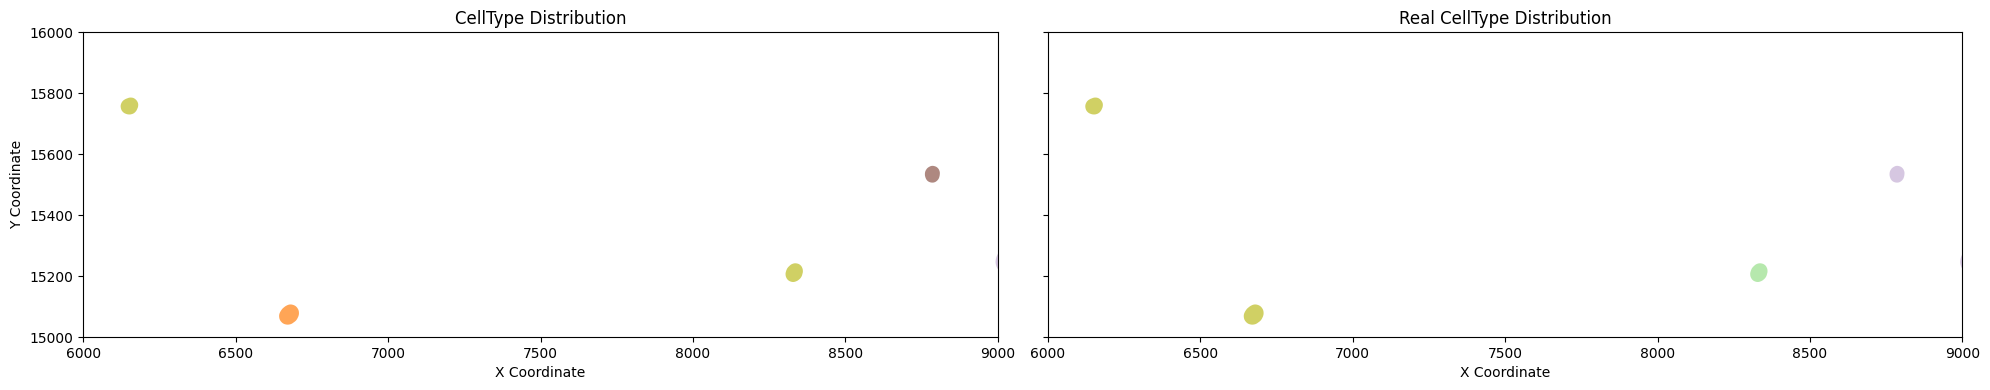

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_gdf['CellType'] = filtered_gdf['CellType'].astype(str)
filtered_gdf['realCellType'] = filtered_gdf['realCellType'].astype(str)

# Extract unique categories from both columns
cell_type_categories = filtered_gdf['CellType'].unique()
real_cell_type_categories = filtered_gdf['realCellType'].unique()

# Combine unique categories from both columns
all_categories = sorted(set(cell_type_categories).union(real_cell_type_categories))

# Define a colormap with enough colors for all unique categories
num_categories = len(all_categories)
cmap = plt.get_cmap('tab20', num_categories) 
colors = {category: cmap(i) for i, category in enumerate(all_categories)}

# Define functions to get color based on category
def get_color(category):
    return colors.get(category, 'gray')  # Default to gray for unknown types

# Create legend handles
handles = [Line2D([0], [0], color=colors[cat], lw=4) for cat in all_categories]

# Create a figure with two subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)

# Define your zoom area (bounding box coordinates)
xmin, xmax, ymin, ymax = 6000, 9000, 15000, 16000  # Adjust these values as needed

# Plot by 'CellType'
filtered_gdf.plot(
    ax=axarr[0],
    color=[get_color(ct) for ct in filtered_gdf['CellType']],
    alpha=0.7
)
axarr[0].set_title('CellType Distribution')
axarr[0].set_xlabel('X Coordinate')
axarr[0].set_ylabel('Y Coordinate')
axarr[0].set_xlim(xmin, xmax)  # Set x-axis limits for zoom
axarr[0].set_ylim(ymin, ymax)  # Set y-axis limits for zoom

# Plot by 'realCellType'
filtered_gdf.plot(
    ax=axarr[1],
    color=[get_color(rct) for rct in filtered_gdf['realCellType']],
    alpha=0.7
)
axarr[1].set_title('Real CellType Distribution')
axarr[1].set_xlabel('X Coordinate')
axarr[1].set_xlim(xmin, xmax)  # Set x-axis limits for zoom
axarr[1].set_ylim(ymin, ymax)  # Set y-axis limits for zoom
# Adjust layout and display
plt.tight_layout()
plt.show()


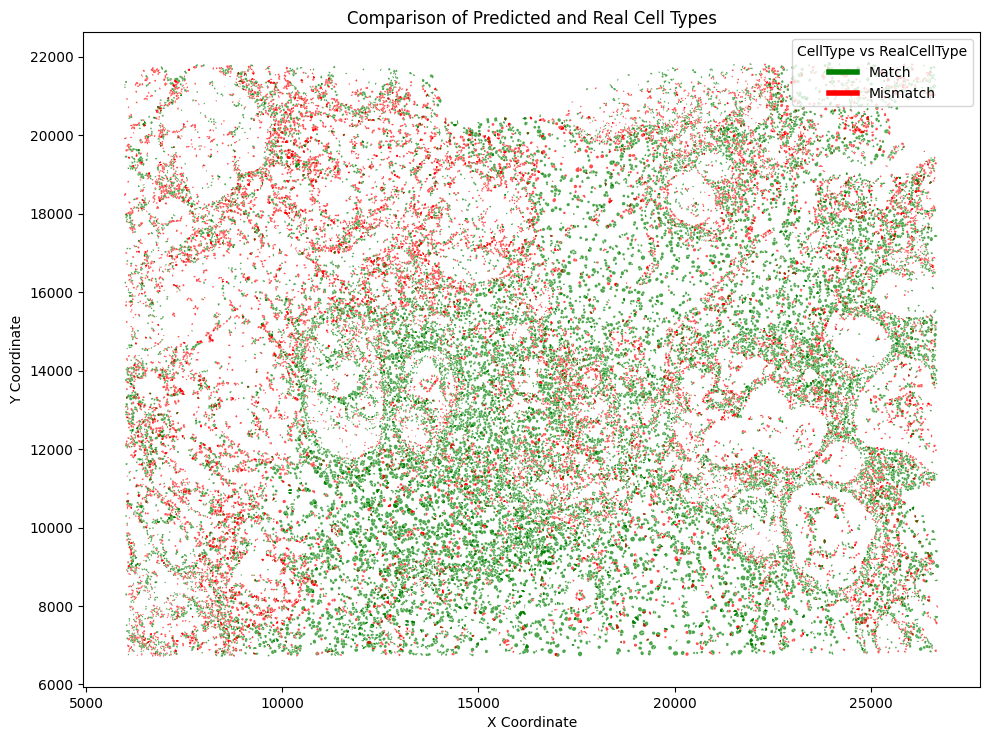

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_joined_with_types['CellType'] = filtered_joined_with_types['CellType'].astype(str)
filtered_joined_with_types['realCellType'] = filtered_joined_with_types['realCellType'].astype(str)

# Add a new column to indicate where CellType matches realCellType
filtered_joined_with_types['Match'] = filtered_joined_with_types['CellType'] == filtered_joined_with_types['realCellType']

# Define colors for matching (green) and non-matching (red)
match_colors = {True: 'green', False: 'red'}

# Create a figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the polygons with colors based on the Match column
filtered_joined_with_types.plot(
    ax=ax,
    color=[match_colors[match] for match in filtered_joined_with_types['Match']],
    alpha=0.7
)

# Create custom legend
handles = [Line2D([0], [0], color='green', lw=4, label='Match'),
           Line2D([0], [0], color='red', lw=4, label='Mismatch')]

ax.legend(handles=handles, title='CellType vs RealCellType')

# Set title and labels
ax.set_title('Comparison of Predicted and Real Cell Types')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


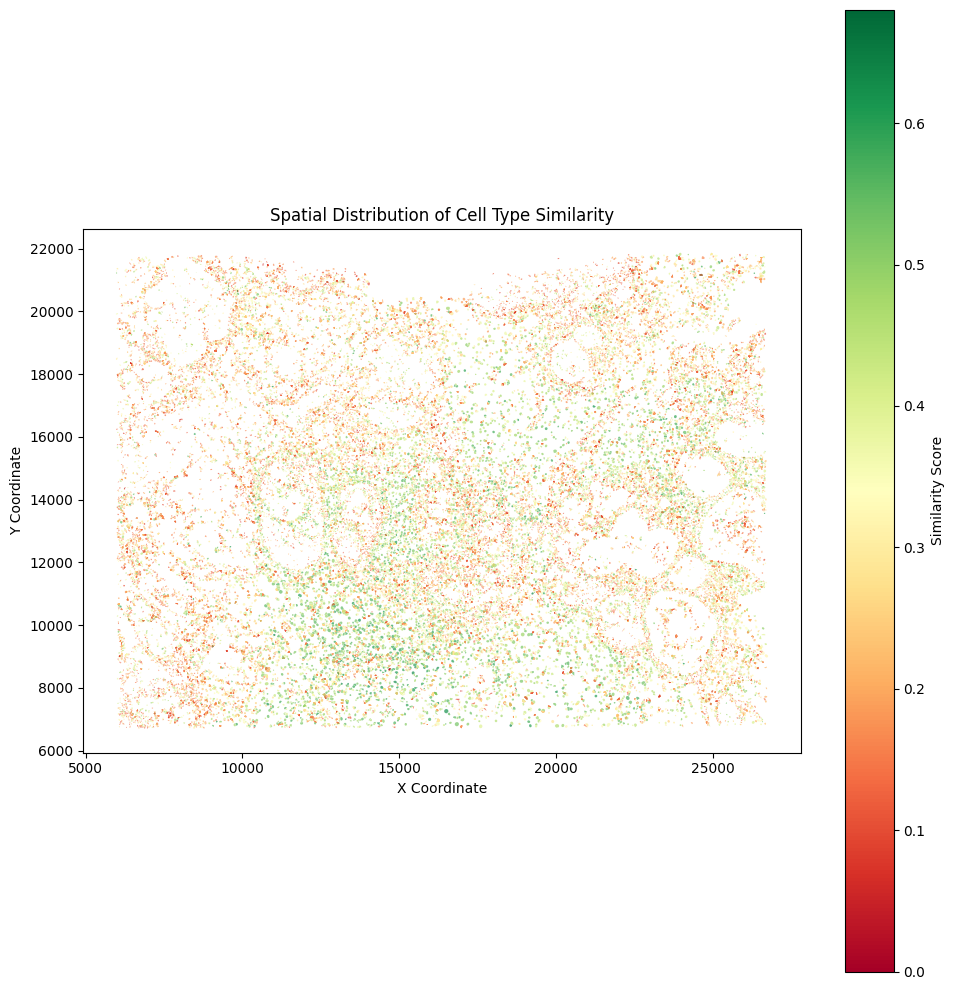

In [57]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assume `adata` is your AnnData object
# Extract the relevant columns from `adata.obs`
obs_df = adata.obs[['cell_id', 'similarity']]  # Adjust this to match your actual column names

# Merge the `obs_df` with your GeoDataFrame `filtered_joined_with_types`
merged_gdf = pd.merge(filtered_joined_with_types, obs_df, on='cell_id', how='left')

# If not already, convert `merged_gdf` back to a GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry='geometry')

# Now you can visualize the similarity scores on the map

# Define a colormap for similarity scores (e.g., using a green-red gradient)
cmap = plt.get_cmap('RdYlGn')  # Red to Green gradient
norm = mcolors.Normalize(vmin=merged_gdf['similarity'].min(), vmax=merged_gdf['similarity'].max())

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(
    ax=ax,
    column='similarity',  # Use the similarity column to define the color
    cmap=cmap,
    norm=norm,
    legend=True,
    legend_kwds={'label': "Similarity Score", 'orientation': "vertical"},
    alpha=0.7
)

# Set title and labels
ax.set_title('Spatial Distribution of Cell Type Similarity')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
